<a href="https://colab.research.google.com/github/DSKI23/alzheimervalentin/blob/explore_lialko/Data_exploration/data_exploration_lialko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syste

In [95]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

alzheimer_df = load_dataset("DS23-KI-Projekt/alzheimerdataset")
df = alzheimer_df["train"].to_pandas()
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


<Axes: xlabel='Alzheimer’s Diagnosis', ylabel='count'>

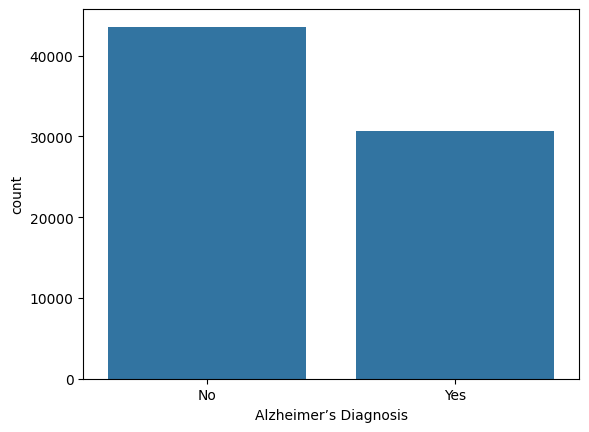

In [96]:
alz_count = df['Alzheimer’s Diagnosis'].value_counts()
sns.barplot(alz_count)

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by country"}, xlabel='Percentage', ylabel='Country'>

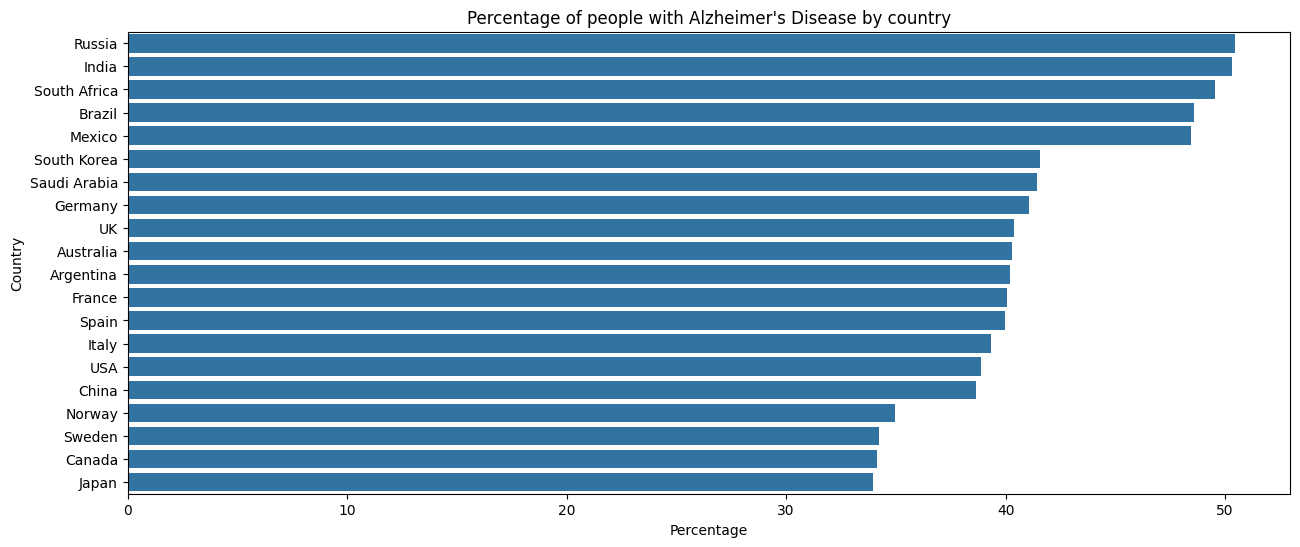

In [120]:
import pandas as pd

# Count total diagnoses per country
all_counts = df.groupby('Country')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')

# Count only "Yes" cases per country
yes_counts = df.groupby('Country')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

# Merge both counts
merged_df = pd.merge(all_counts, yes_counts, on='Country')

# Display result

merged_df["Percentage"] = (merged_df["Yes Count"]/merged_df['Total Count']*100).round(2)

merged_df = merged_df.sort_values("Percentage", ascending=False)


plt.figure(figsize=(15, 6))
plt.title("Percentage of people with Alzheimer's Disease by country")
sns.barplot(data=merged_df, x='Percentage', y='Country')

Text(0.5, 1.0, "Count of people with Alzheimer's Disease")

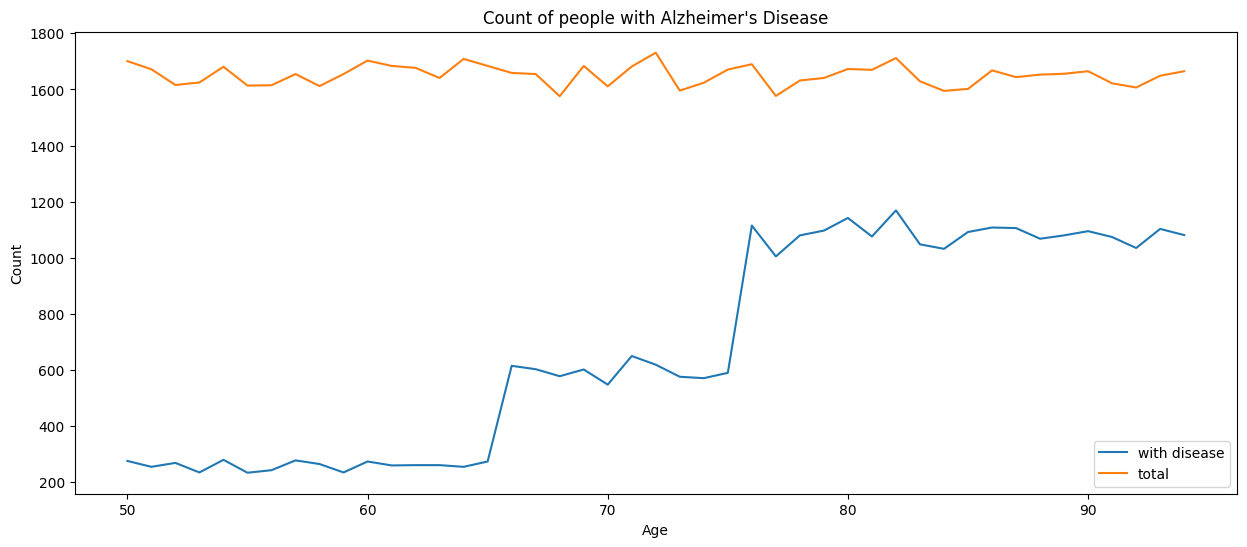

In [123]:
alzheimer_counts = df.groupby('Age')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Count', ascending=False)

total_counts = df.groupby('Age')['Alzheimer’s Diagnosis'].count().reset_index(name='Count')
plt.figure(figsize=(15, 6))
sns.lineplot(data=alzheimer_counts, x='Age', y='Count', label="with disease")
sns.lineplot(data=total_counts, x='Age', y='Count', label="total")
plt.title("Count of people with Alzheimer's Disease")

In [166]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by Genetic Risk Factor (APOE-ε4 allele)"}, xlabel='Genetic Risk Factor (APOE-ε4 allele)', ylabel='Percentage'>

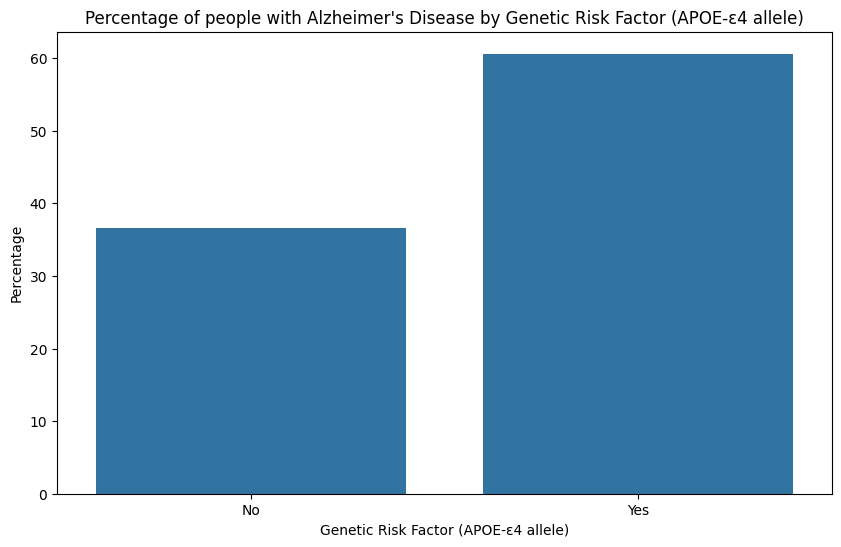

In [172]:


alzheimer_counts = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Genetic Risk Factor (APOE-ε4 allele)")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_1 = m_df.sort_values("Percentage", ascending=False)



plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by Genetic Risk Factor (APOE-ε4 allele)")
sns.barplot(data=m_df, x='Genetic Risk Factor (APOE-ε4 allele)', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Family History of Alzheimer’s'"}, xlabel='Family History of Alzheimer’s', ylabel='Percentage'>

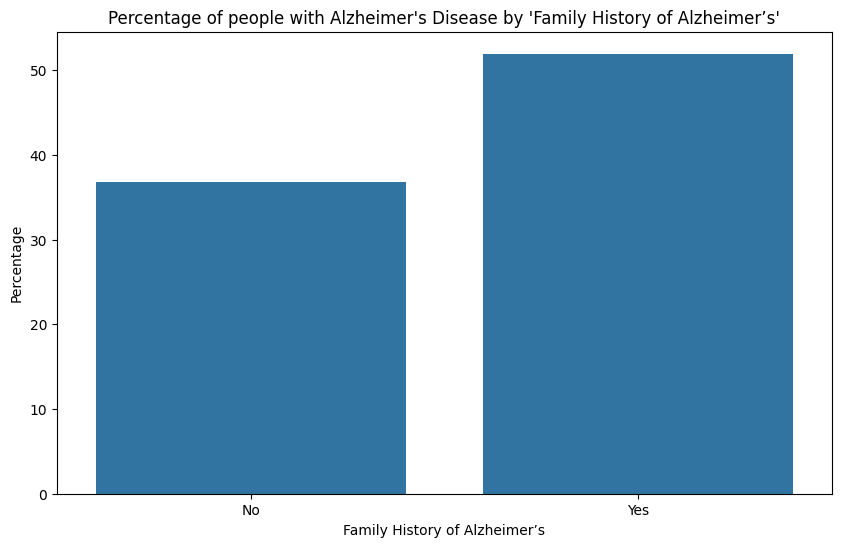

In [171]:
'Family History of Alzheimer’s'


alzheimer_counts = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Family History of Alzheimer’s")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Family History of Alzheimer’s'")
sns.barplot(data=m_df, x='Family History of Alzheimer’s', y="Percentage")

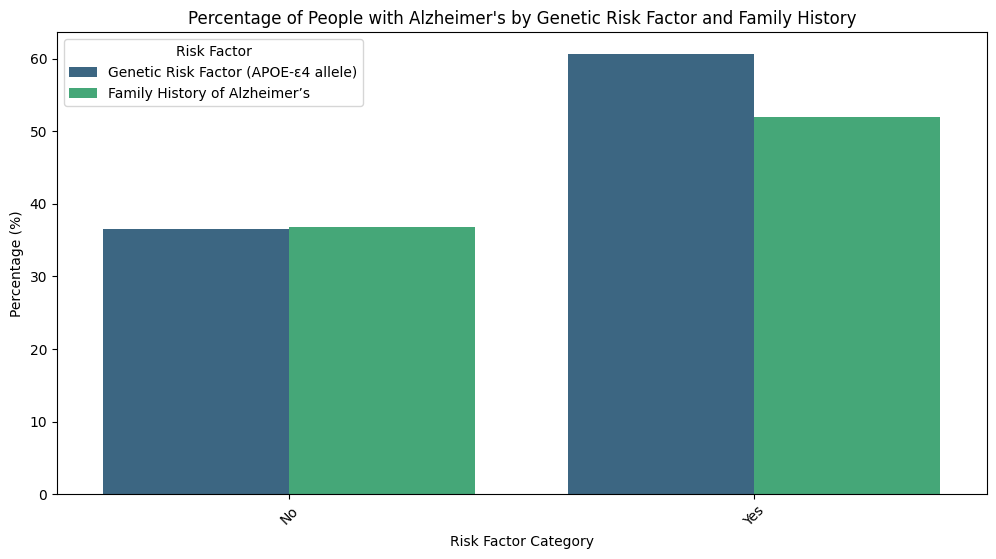

In [178]:
# Calculate Alzheimer's diagnosis percentage by Genetic Risk Factor
genetic_counts = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')
genetic_counts = genetic_counts.sort_values(by='Yes Count', ascending=False)
total_genetic = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')
m_df_genetic = pd.merge(total_genetic, genetic_counts, on="Genetic Risk Factor (APOE-ε4 allele)")
m_df_genetic["Percentage"] = (m_df_genetic["Yes Count"] / m_df_genetic['Total Count'] * 100).round(2)
m_df_genetic["Factor"] = "Genetic Risk Factor (APOE-ε4 allele)"  # Add a label for hue

# Calculate Alzheimer's diagnosis percentage by Family History
family_counts = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')
family_counts = family_counts.sort_values(by='Yes Count', ascending=False)
total_family = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')
m_df_family = pd.merge(total_family, family_counts, on="Family History of Alzheimer’s")
m_df_family["Percentage"] = (m_df_family["Yes Count"] / m_df_family['Total Count'] * 100).round(2)
m_df_family.rename(columns={'Family History of Alzheimer’s': 'Genetic Risk Factor (APOE-ε4 allele)'}, inplace=True)
m_df_family["Factor"] = "Family History of Alzheimer’s"  # Add a label for hue

# Merge both datasets
merged_df = pd.concat([m_df_genetic, m_df_family])

# Plot the merged bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=merged_df,
    x='Genetic Risk Factor (APOE-ε4 allele)',
    y='Percentage',
    hue='Factor',  # Differentiates Genetic Risk Factor vs. Family History
    palette='viridis'
)

# Labels and title
plt.xlabel('Risk Factor Category')
plt.ylabel('Percentage (%)')
plt.title("Percentage of People with Alzheimer's by Genetic Risk Factor and Family History")
plt.xticks(rotation=45)  # Rotate for better readability
plt.legend(title="Risk Factor")

# Show plot
plt.show()